# Introduction to QR Code

Barcodes are commonly used to represent data in a visual, machine-readable form.

## Barcode Content

Barcode content are plaint text. But the text can be prefixed to represent different type of data. Such text is called **actionable text**.

| Content Type        | Prefixes                         | Examples                                                     |
|:--------------------|:---------------------------------|:-------------------------------------------------------------|
| Web or URL          | http://      https://            | https://www\.yahoo\.com                                      |
| E\-mail address     | mailto:                          | mailto:someone@yoursite\.com                                 |
| Telephone numbers   | tel:                             | tel:\+12125551212                                            |
| Contact information | Use vCard or MECARD formats      |                                                              |
| SMS                 | sms:                             | sms:\+18005551212                                            |
| FaceTime            | facetime:                        | facetime:\+18005551212       facetime:me@icloud\.com         |
| GPS, Map            | geo:                             | geo:40\.71872,\-73\.98905,100                                |
| Calendar            | Use iCalendar format             |                                                              |
| WIFI Config         |                                  | WIFI:T:WPA;S:mynetwork;P:mypass;;                            |
| Google Play Store   | Only applicable on Android phone | market://details?id=org\.example\.foo                        |
| App Store           | Only applicable on iPhone        | https://itunes\.apple\.com/us/app/fortnite/id1261357853?mt=8 |


Reference: https://github.com/zxing/zxing/wiki/Barcode-Contents

## Generate Barcode

In [22]:
!pip install qrcode

In [24]:
import qrcode
def gen_qr(data, output_file='qr.png'):
    img = qrcode.make(data)
    img.save(output_file)

In [25]:
data = 'tel:+6581234567'
gen_qr(data)

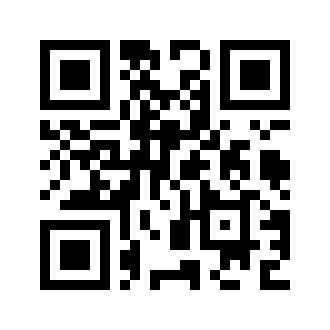

In [26]:
from IPython.display import Image, display
display(Image(filename='qr.png'))

### Alternative Method

In [19]:
import qrcode
def gen_qr_adv(data, output_file='qr.png',
            error_correction=qrcode.constants.ERROR_CORRECT_H):

    qr = qrcode.QRCode(error_correction=error_correction)
    qr.add_data(data)
    qr.make()
    img = qr.make_image()
    img.save(output_file)

In [20]:
data = 'geo:1.3521,103.8198'
gen_qr_adv(data)

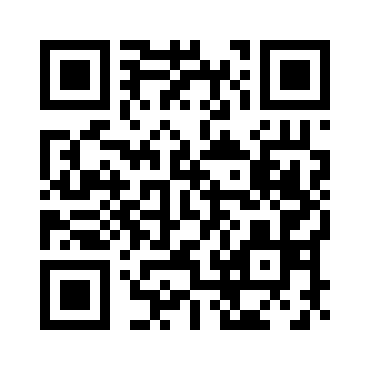

In [21]:
from IPython.display import Image, display
display(Image(filename='qr.png'))

## Embed QR Code into Image

Install required library `pillow`

In [23]:
!pip install pillow

Resize QR image to smaller size.

In [39]:
def resize_image(img, maxwidth=256, maxheight=256):
    width, height = img.size 
    ratio = min(maxwidth/width, maxheight/height)
    newimg = img.resize((int(width*ratio), int(height*ratio)))
    return newimg

Paste QR image on to background image.

In [48]:
import qrcode
from PIL import Image

img_bg = Image.open('background.jpg')
img_qr = Image.open('qr.png')

# resize QR image
img_small = resize_image(img_qr, maxwidth=128)

# Position to paste at bottom right corner
pos = (img_bg.size[0] - img_small.size[0], img_bg.size[1] - img_small.size[1])

img_bg.paste(img_small, pos)
img_bg.save('_temp/_qr_bg.png')

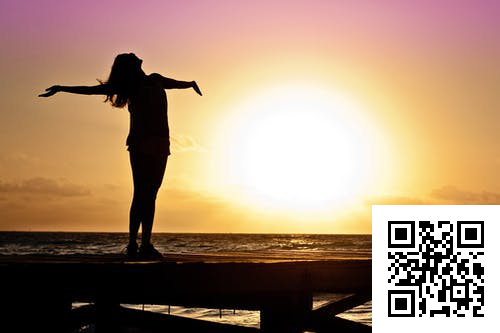

In [49]:
from IPython.display import Image, display
display(Image(filename='_temp/_qr_bg.png'))

## Embed Image in QR Code

You can also embedded a image, e.g. a logo, at the center of QR code image.

In [59]:
from PIL import Image
img_qr = Image.open('qr.png')

# So that logo will be color instead of graysale
img_qr_rgb = img_qr.convert('RGB')

# resize logo image
img_logo = Image.open('logo.jpg')
img_small = resize_image(img_logo, maxwidth=64)

pos = ((img_qr_rgb.size[0] - img_small.size[0]) // 2, (img_qr_rgb.size[1] - img_small.size[1]) // 2)

img_qr_rgb.paste(img_small, pos)
img_qr_rgb.save('_temp/_qr_logo.png')

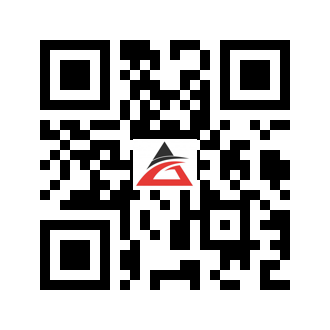

In [60]:
from IPython.display import Image, display
display(Image(filename='_temp/_qr_logo.png'))

## Reference

* https://note.nkmk.me/en/python-pillow-qrcode
* https://pillow.readthedocs.io/en/stable/reference/Image.html